Import library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read data from kaggle


In [2]:
data = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")

In [3]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking duplicate data

In [5]:
duplicate_datarow = data[data.duplicated()]
print("Duplicate rows: ", duplicate_datarow.shape)

Duplicate rows:  (1, 14)


In [6]:
data = data.drop_duplicates()

In [7]:
duplicate_datarow = data[data.duplicated()]
print("Duplicate rows: ", duplicate_datarow.shape)

Duplicate rows:  (0, 14)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [9]:
data.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**Basic descriptive analysis**

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


**Exploratory data analysis**

<AxesSubplot:xlabel='output', ylabel='count'>

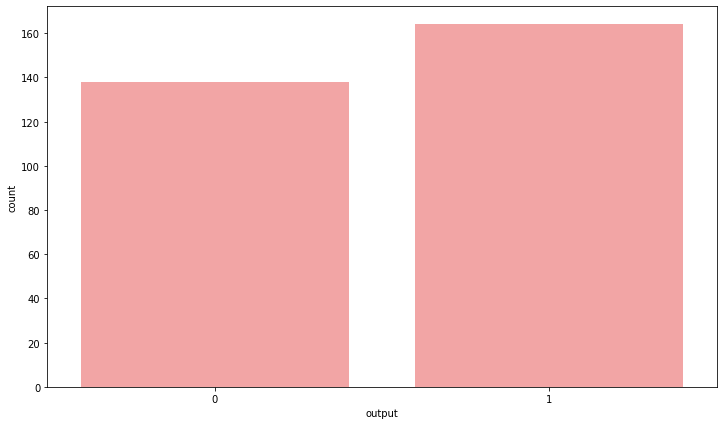

In [12]:
plt.figure(figsize=(12,7))
sns.countplot(x=data["output"], color="red", alpha=0.4)

In [13]:
print(data['age'].mean())
print(data['age'].min())
print(data['age'].max())

54.420529801324506
29
77


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

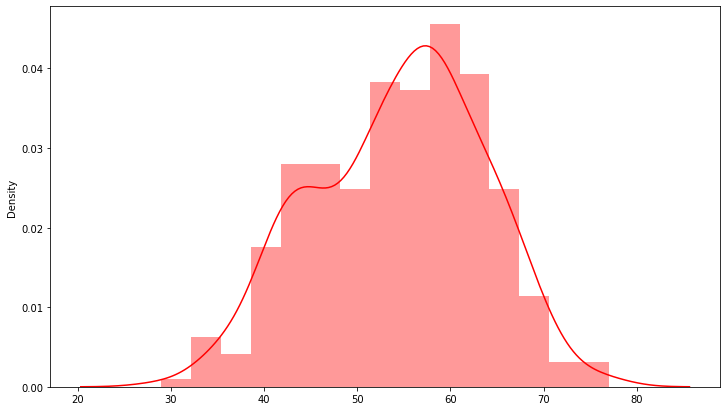

In [14]:
plt.figure(figsize=(12,7))
sns.distplot(x=data["age"], bins=15, color="red")

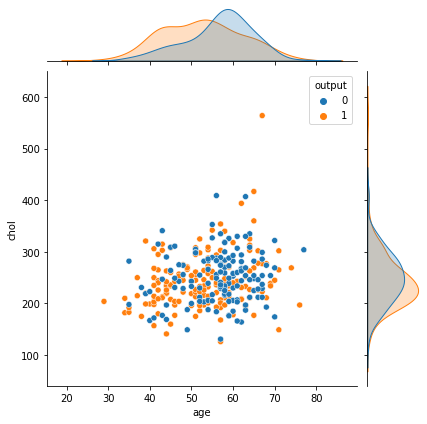

In [15]:
sns.jointplot(x="age", y="chol", data=data, hue="output")

****Removing out layer****

In [16]:
data = data[data["chol"] < 380]

In [17]:
data["chol"].max()

360

In [18]:
gender_gb = data.groupby("output")["sex"]
gender_gb.value_counts()

output  sex
0       1      114
        0       22
1       1       92
        0       69
Name: sex, dtype: int64

In [19]:
data = data[data["trtbps"] < 180]

In [20]:
data["trtbps"].max()

178

In [21]:
data = data[data["thalachh"] > 100]

In [22]:
data["thalachh"].min()

103

In [23]:
ekg_normal = len(data[data["restecg"] == 0])/len(data["restecg"])*100
ekg_normal

48.23943661971831

In [24]:
ekg1 = len(data[data["restecg"] == 1])/len(data["restecg"])*100
ekg2 = len(data[data["restecg"] == 2])/len(data["restecg"])*100
ekg_normal = len(data[data["restecg"] == 0])/len(data["restecg"])*100

print("Abnormal EKG: {:.2f}".format(ekg1))
print("\n")
print("Hypertrophy by Estes: {:.2f}".format(ekg2))
print("\n")
print("Normal EKG: {:.2f}".format(ekg_normal))

Abnormal EKG: 50.70


Hypertrophy by Estes: 1.06


Normal EKG: 48.24


<AxesSubplot:>

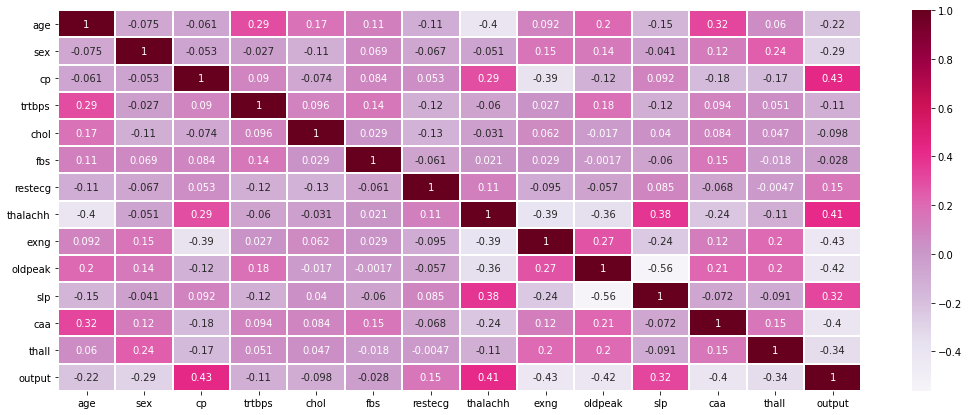

In [25]:
plt.figure(figsize=(18,7))
sns.heatmap(data.corr(method="pearson"), cmap="PuRd", annot=True, lw=0.1)

In [26]:
data["caa"] = data["caa"].replace([2,3,4],1)
data["caa"].value_counts()

0    168
1    116
Name: caa, dtype: int64

In [27]:
data["oldpeak"].min()

0.0

In [28]:
data["oldpeak"] = data["oldpeak"].replace(0.0, 0.01)
data["oldpeak"].value_counts()

0.01    95
1.20    14
0.60    14
1.40    13
0.20    12
0.80    12
1.00    12
1.80     9
1.60     9
0.40     9
2.00     8
0.10     7
2.60     6
2.80     6
1.50     5
3.00     5
0.50     5
1.90     4
3.60     4
0.30     3
2.40     3
0.90     3
2.20     3
3.40     2
2.30     2
4.20     2
3.20     2
2.50     2
1.10     2
4.00     1
0.70     1
3.80     1
6.20     1
5.60     1
3.10     1
2.90     1
4.40     1
1.30     1
3.50     1
2.10     1
Name: oldpeak, dtype: int64

In [29]:
data["log_oldpeak"] = np.log10(data["oldpeak"])

In [30]:
data = data.drop("oldpeak", axis=1)

In [31]:
data.corr()["output"]

age           -0.220582
sex           -0.291033
cp             0.426751
trtbps        -0.113897
chol          -0.098477
fbs           -0.028433
restecg        0.150357
thalachh       0.412785
exng          -0.432780
slp            0.322883
caa           -0.460963
thall         -0.338490
output         1.000000
log_oldpeak   -0.348075
Name: output, dtype: float64

In [32]:
data = data.drop(["trtbps", "chol", "restecg", "fbs", "age", "sex"], axis=1)

In [33]:
data.corr()["output"]

cp             0.426751
thalachh       0.412785
exng          -0.432780
slp            0.322883
caa           -0.460963
thall         -0.338490
output         1.000000
log_oldpeak   -0.348075
Name: output, dtype: float64

In [34]:
data.head()

,cp,thalachh,exng,slp,caa,thall,output,log_oldpeak
0,3,150,0,0,0,1,1,0.361728
1,2,187,0,0,0,2,1,0.544068
2,1,172,0,2,0,2,1,0.146128
3,1,178,0,2,0,2,1,-0.096910
4,0,163,1,2,0,2,1,-0.221849


Creating X,Y variable for training

In [35]:
X = data.drop("output", axis=1)
y = data["output"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Prediction

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
tree_model = DecisionTreeClassifier(max_depth=15, random_state=42)

In [40]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [41]:
tree_predict = tree_model.predict(X_test)

In [42]:
tree_predict

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(classification_report(y_test, tree_predict))
print("Confusion Report:")
print(confusion_matrix(y_test, tree_predict))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.81      0.84      0.83        31

    accuracy                           0.81        57
   macro avg       0.81      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57

Confusion Report:
[[20  6]
 [ 5 26]]


Random forest classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
random_model = RandomForestClassifier(n_estimators=80, bootstrap=True, random_state=42, criterion="entropy")

In [47]:
random_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=80, random_state=42)

In [48]:
random_predict = random_model.predict(X_test)

Predictive mode: Linear model

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log_model = LogisticRegression(solver="liblinear", random_state=42)

In [51]:
log_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [52]:
log_predict = log_model.predict(X_test)

In [53]:
print(classification_report(y_test, log_predict))
print("Confusion Report:")
print(confusion_matrix(y_test, log_predict))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83        26
           1       0.81      0.97      0.88        31

    accuracy                           0.86        57
   macro avg       0.88      0.85      0.85        57
weighted avg       0.87      0.86      0.86        57

Confusion Report:
[[19  7]
 [ 1 30]]


Predictive model Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
gaussian_model = GaussianNB()

In [56]:
gaussian_model.fit(X_train, y_train)

GaussianNB()

In [57]:
gaussian_predict = gaussian_model.predict(X_test)

In [58]:
print(classification_report(y_test, gaussian_predict))
print("Confusion Report:")
print(confusion_matrix(y_test, gaussian_predict))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.82      0.90      0.86        31

    accuracy                           0.84        57
   macro avg       0.85      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57

Confusion Report:
[[20  6]
 [ 3 28]]


All algorithm report

In [59]:
report = [["GaussianNB", 0.84, 0.84, 0.84, 0.84], ["Random Forest", 0.82, 0.83, 0.82, 0.82], 
          ["DecisionTreeClassifier", 0.81, 0.81, 0.81, 0.81],
          ["LogisticRegression", 0.88, 0.87, 0.86, 0.86]]
overall_result = pd.DataFrame(report, columns=["Model", "Accuracy Score", "Precision", "Recall", "F1-score"])
overall_result.sort_values("Accuracy Score", ascending=False)

,Model,Accuracy Score,Precision,Recall,F1-score
3,LogisticRegression,0.88,0.87,0.86,0.86
0,GaussianNB,0.84,0.84,0.84,0.84
1,Random Forest,0.82,0.83,0.82,0.82
2,DecisionTreeClassifier,0.81,0.81,0.81,0.81
